In [1]:
# import data manupulation library
import pandas as pd
import numpy as np
# import data visuvlazation library
import seaborn as sns
import matplotlib.pyplot as plt
# import data filter warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data using url from github
url = 'https://raw.githubusercontent.com/bhagyashrii0806/SUPPLYCHAIN01/refs/heads/main/SCM%20-%20SCM.csv'

df = pd.read_csv(url)

df.sample(frac = 1) # data shuffle

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
10488,WH_110488,EID_60488,Rural,Large,South,Zone 5,5,0,2,6526,...,1,242,25.0,2022.0,8,0,B+,2,25,9093
4290,WH_104290,EID_54290,Rural,Large,North,Zone 5,5,3,3,4220,...,1,215,18.0,NaN,11,1,C,6,14,15135
17847,WH_117847,EID_67847,Rural,Large,North,Zone 6,1,1,2,4374,...,0,184,25.0,NaN,33,1,C,3,28,43091
21044,WH_121044,EID_71044,Rural,Mid,West,Zone 4,0,1,4,4546,...,1,165,40.0,NaN,10,0,A,2,11,14085
3449,WH_103449,EID_53449,Rural,Large,West,Zone 6,4,0,4,4736,...,0,101,25.0,2000.0,28,0,B,3,23,35056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16133,WH_116133,EID_66133,Rural,Mid,North,Zone 2,8,2,2,4857,...,0,268,21.0,2021.0,0,0,NaN,0,12,8056
8060,WH_108060,EID_58060,Rural,Small,South,Zone 1,1,0,2,4590,...,1,56,34.0,NaN,24,0,A,3,21,31063
15211,WH_115211,EID_65211,Rural,Small,North,Zone 6,6,0,2,6259,...,1,258,34.0,2017.0,11,1,A,1,9,15082
20387,WH_120387,EID_70387,Rural,Large,West,Zone 5,1,0,4,4296,...,1,112,29.0,NaN,12,0,C,4,10,15092


In [3]:
# cheking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

In [4]:

'''
the falling data is found to be non - normal distributed, since mean != median
'''
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000,21273.000000,11605.000000,22150.000000,22150.000000,22150.000000,22150.000000,22150.000000
mean,4.097020,0.777201,3.103928,4983.115711,42.386998,0.098691,0.054492,0.656072,163.613725,28.936398,2009.401206,17.116659,0.304199,3.487765,18.767765,22086.780813
std,2.606289,1.201747,1.142886,1050.634225,16.057730,0.298253,0.226991,0.475028,62.660709,7.843431,7.527223,9.174193,0.460078,1.691661,8.644778,11626.192340
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4309.250000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12151.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,20.000000,22099.000000
75%,6.000000,1.000000,4.000000,5499.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30102.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


Text(0.5, 1.0, 'Bar plot showing null values in dataset')

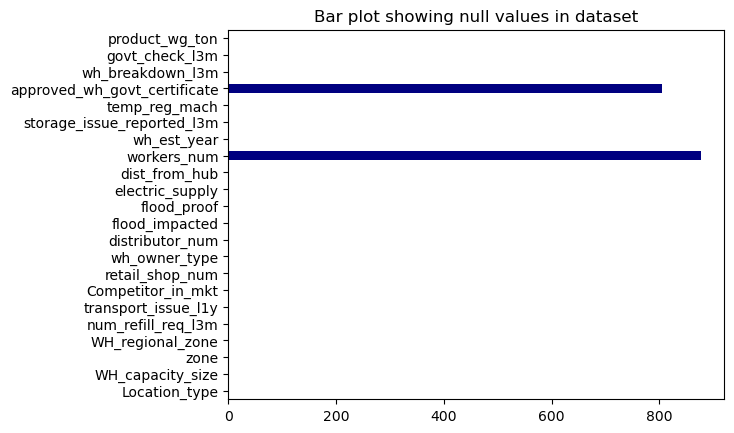

In [51]:
# cheking null values in dataset
df.isnull().sum().plot(kind = 'barh', cmap = 'jet')
plt.title('Bar plot showing null values in dataset')


In [6]:
# calculation missing value percentage:
(df['approved_wh_govt_certificate'].isnull().sum()/ len(df['approved_wh_govt_certificate']))*100

3.6343115124153504

In [7]:
(df['wh_est_year'].isnull().sum()/ len(df['wh_est_year']))*100

47.60722347629797

In [8]:
df['wh_est_year'].value_counts().head(10)

wh_est_year
2000.0    495
2002.0    479
2006.0    475
2014.0    474
2007.0    465
2004.0    458
2016.0    454
2001.0    450
1998.0    449
2018.0    448
Name: count, dtype: int64

In [9]:
df['wh_est_year'].quantile(0.75),df['wh_est_year'].quantile(0.25)

(2016.0, 2003.0)

In [10]:
df['wh_est_year'].median()

2009.0

In [11]:
df['wh_est_year'].mean()

2009.4012063765617

<Axes: ylabel='Frequency'>

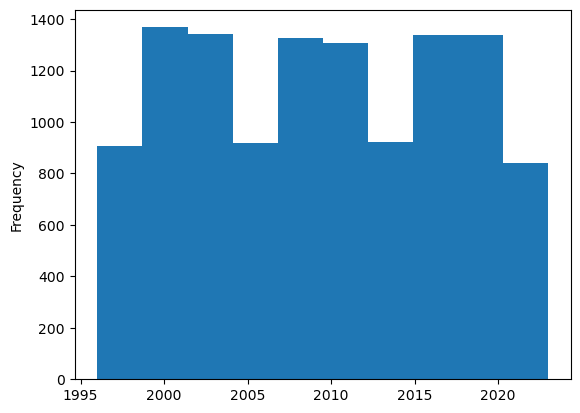

In [12]:
df['wh_est_year'].plot(kind = 'hist')

In [13]:
# imputing the missing value column 
df['wh_est_year'].fillna(2009,inplace = True)

In [14]:
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode(),inplace = True)

In [15]:
categorical_colunm = df.select_dtypes(include = 'object')

In [16]:
numrical_colunm = df.select_dtypes(exclude = 'object')

In [17]:
categorical_colunm

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,C
...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,B


In [18]:
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,2009.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,2009.0,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,2009.0,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,2009.0,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,5030,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,4320,...,0,170,NaN,2009.0,26,0,C,5,9,33108
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,5268,...,0,99,22.0,2009.0,20,0,B+,6,4,24072
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,4378,...,0,220,17.0,2009.0,13,0,B,3,28,15055


In [19]:
df['Location_type'].value_counts()

Location_type
Rural    20334
Urban     1816
Name: count, dtype: int64

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location_type'] = le.fit_transform(df['Location_type'])

In [21]:
df['Location_type'].value_counts()

Location_type
0    20334
1     1816
Name: count, dtype: int64

In [83]:
df['WH_capacity_size'] = le.fit_transform(df['WH_capacity_size'])

In [23]:
df['Location_type'].value_counts()

Location_type
0    20334
1     1816
Name: count, dtype: int64

In [47]:
# Drop unrequired columns 
df.drop(columns = ['Ware_house_ID','WH_Manager_ID'],axis = 1,inplace = True)

In [49]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,2009.0,13,0,A,5,15,17115
1,0,0,North,Zone 5,0,0,4,6217,Company Owned,47,...,1,210,31.0,2009.0,4,0,A,3,17,5074
2,0,1,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,161,37.0,2009.0,17,0,A,6,22,23137
3,0,1,North,Zone 3,7,4,2,6000,Rented,50,...,0,103,21.0,2009.0,17,1,A+,3,27,22115
4,0,0,North,Zone 5,3,1,2,4740,Company Owned,42,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0,0,North,Zone 6,8,1,3,5030,Rented,46,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
22146,0,2,South,Zone 6,3,1,3,4320,Rented,60,...,0,170,NaN,2009.0,26,0,C,5,9,33108
22147,0,0,North,Zone 6,7,2,2,5268,Company Owned,64,...,0,99,22.0,2009.0,20,0,B+,6,4,24072
22148,0,0,North,Zone 6,6,2,4,4378,Rented,32,...,0,220,17.0,2009.0,13,0,B,3,28,15055


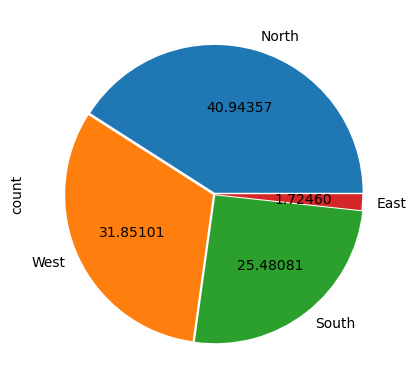

In [57]:
df['zone'].value_counts().plot(kind = 'pie',autopct = '%1.5f', explode = [0.01,0.01,0.01,0])
plt.show()

In [59]:
# Evaluate the data for West Zone 

westzone = df[df['zone'] == 'West']
westzone

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,West,Zone 6,3,1,2,4651,Rented,24,...,1,91,29.0,2009.0,13,0,A,5,15,17115
5,0,2,West,Zone 1,8,0,2,5053,Rented,37,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,0,0,West,Zone 6,8,0,4,4449,Company Owned,38,...,1,77,27.0,2010.0,24,0,B,3,6,30142
14,0,2,West,Zone 6,8,1,4,5022,Rented,68,...,1,129,37.0,2009.0,6,0,B,3,9,7055
16,0,1,West,Zone 4,0,0,2,5569,Company Owned,16,...,1,231,28.0,2009.0,9,0,B+,5,11,12127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22119,0,0,West,Zone 6,8,0,4,4687,Rented,62,...,1,160,26.0,2005.0,32,0,B,3,23,40086
22138,0,1,West,Zone 4,7,0,3,4686,Company Owned,55,...,1,148,28.0,2010.0,23,0,B+,6,11,29130
22139,0,1,West,Zone 3,5,0,4,3771,Rented,66,...,0,97,30.0,1998.0,24,0,C,2,19,30102
22140,0,0,West,Zone 5,7,0,4,4593,Rented,18,...,1,78,24.0,2008.0,18,0,B+,6,14,21128


In [61]:
df['zone'].value_counts()


zone
North    9069
West     7055
South    5644
East      382
Name: count, dtype: int64

In [65]:
df['zone'] = le.fit_transform(df['zone'])

In [67]:
df['zone'].value_counts()

zone
1    9069
3    7055
2    5644
0     382
Name: count, dtype: int64

In [69]:
df['WH_regional_zone'].value_counts()

WH_regional_zone
Zone 6    7376
Zone 5    4045
Zone 4    3708
Zone 2    2642
Zone 3    2552
Zone 1    1827
Name: count, dtype: int64

In [71]:
df['WH_regional_zone'] = le.fit_transform(df['WH_regional_zone'])

In [73]:
df['WH_regional_zone'].value_counts()

WH_regional_zone
5    7376
4    4045
3    3708
1    2642
2    2552
0    1827
Name: count, dtype: int64

In [75]:
df['wh_owner_type'].value_counts()

wh_owner_type
Company Owned    12035
Rented           10115
Name: count, dtype: int64

In [77]:
df['wh_owner_type'] = le.fit_transform(df['wh_owner_type'])

In [79]:
df['wh_owner_type'].value_counts()

wh_owner_type
0    12035
1    10115
Name: count, dtype: int64

In [87]:
categorical_colunm

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,C
...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,B


In [89]:
df['approved_wh_govt_certificate'].value_counts()

approved_wh_govt_certificate
C     4859
B+    4321
B     4269
A     4158
A+    3738
Name: count, dtype: int64

In [91]:
df['approved_wh_govt_certificate'] = le.fit_transform(df['approved_wh_govt_certificate'])

In [93]:
df['approved_wh_govt_certificate'].value_counts()

approved_wh_govt_certificate
4    4859
3    4321
2    4269
0    4158
1    3738
5     805
Name: count, dtype: int64

In [96]:
df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,2009.0,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,2009.0,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37.0,2009.0,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.0,2009.0,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,4,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,0,0,1,5,8,1,3,5030,1,46,...,1,203,28.0,2007.0,22,1,1,2,4,29138
22146,0,2,2,5,3,1,3,4320,1,60,...,0,170,NaN,2009.0,26,0,4,5,9,33108
22147,0,0,1,5,7,2,2,5268,0,64,...,0,99,22.0,2009.0,20,0,3,6,4,24072
22148,0,0,1,5,6,2,4,4378,1,32,...,0,220,17.0,2009.0,13,0,2,3,28,15055


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 22150 non-null  int64  
 1   WH_capacity_size              22150 non-null  int64  
 2   zone                          22150 non-null  int32  
 3   WH_regional_zone              22150 non-null  int32  
 4   num_refill_req_l3m            22150 non-null  int64  
 5   transport_issue_l1y           22150 non-null  int64  
 6   Competitor_in_mkt             22150 non-null  int64  
 7   retail_shop_num               22150 non-null  int64  
 8   wh_owner_type                 22150 non-null  int32  
 9   distributor_num               22150 non-null  int64  
 10  flood_impacted                22150 non-null  int64  
 11  flood_proof                   22150 non-null  int64  
 12  electric_supply               22150 non-null  int64  
 13  d

In [102]:
df['workers_num'].isnull().sum()

877

In [104]:
df['workers_num'].median()

28.0

In [108]:
df['workers_num'].mean()

28.93639825130447

In [110]:
df['workers_num'].fillna(df['workers_num'].median(),inplace= True)